In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, [3, 4]].values

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
affinity_propagation = AffinityPropagation(random_state=42)
y_affinity = affinity_propagation.fit_predict(X)

In [7]:
n_clusters = len(set(y_affinity)) - (1 if -1 in y_affinity else 0)
print(f'Number of clusters: {n_clusters}')

Number of clusters: 11


In [8]:
if n_clusters > 1:
    silhouette_avg = silhouette_score(X, y_affinity)
    print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4317941560811469


In [9]:
supervised = dataset.copy()
supervised['Cluster_group'] = y_affinity

In [10]:
supervised.to_csv("cluster.csv", index=False)

C:\Anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


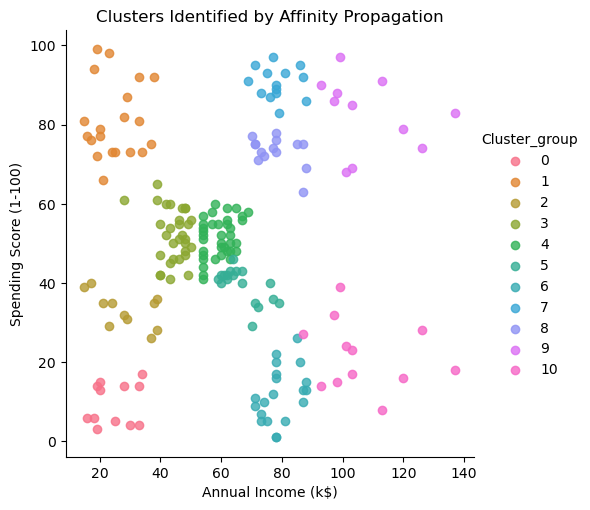

In [13]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue='Cluster_group', 
                   fit_reg=False, legend=True, legend_out=True)
plt.title('Clusters Identified by Affinity Propagation')
plt.show()